**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

### **Descripción de Variables del Dataset de Credit Scoring**

- **status**: Estado del crédito, indicando la situación actual del mismo.
- **seniority**: Años de experiencia laboral del solicitante.
- **home**: Tipo de vivienda del solicitante.
- **time**: Plazo del préstamo en meses.
- **age**: Edad del solicitante.
- **marital**: Estado civil del solicitante.
- **records**: Historial de créditos previos del solicitante.
- **job**: Tipo de trabajo o categoría ocupacional.
- **expenses**: Gastos mensuales reportados.
- **income**: Ingresos mensuales del solicitante.
- **assets**: Valor de los ahorros o activos.
- **debt**: Obligaciones financieras actuales.
- **amount**: Monto solicitado en el préstamo.
- **price**: Prima o valor total a devolver por el crédito.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

#**1. Preprocesamiento de Datos**


---


In [4]:
data = pd.read_csv("CreditRisk.csv")
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [6]:
data.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


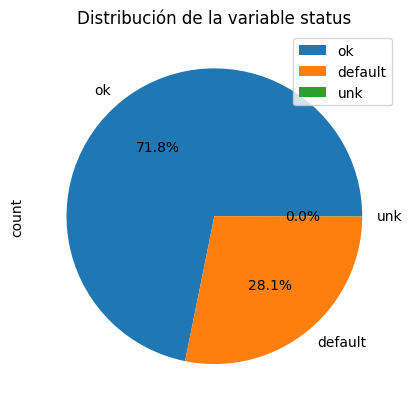

In [15]:

data['status'].value_counts().plot(
    kind='pie',            # Tipo de gráfico
    autopct='%1.1f%%',     # Formato de porcentaje
    startangle=0,         # Ángulo inicial para arrancar el gráfico
    legend=True            # Muestra leyenda
)

plt.title('Distribución de la variable status')
plt.show()

## 1.1 Formato de la columna Default

In [ ]:
#Tu código aquí
data.default.value_counts()

,count
default,
0,3201
1,1254


## 1.2 Datos anomalos

In [ ]:
t_desc_num = data.describe()
t_desc_num.round(0)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0,1.0


Se limpian los valores nulos con 999999

In [ ]:
#Tu código aquí

## 1.3 Imputando Datos

In [ ]:
data.isnull().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


In [ ]:
# Imputar los valores faltantes con la mediana de cada columna
#Tu código aquí

##1.4 Descriptivos Numericos

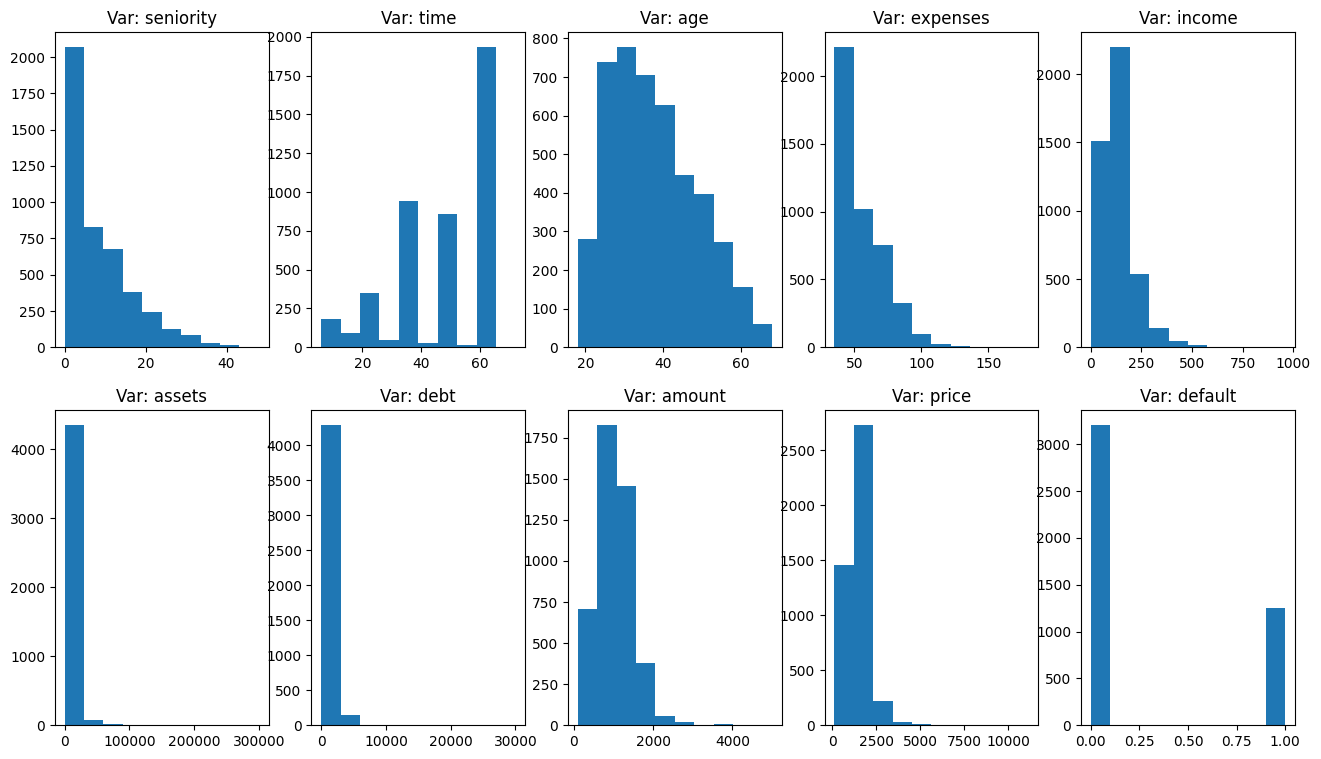

In [ ]:
numerics = t_desc_num.columns
fig, ax = plt.subplots(2,5,figsize=(16,9))
i = 0
for row in range(2):
  for col in range(5):
    #Tu código aquí

In [ ]:
data.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price',
       'default'],
      dtype='object')

## 1.5 Truncando valores atipicos

In [ ]:
trunc = {'expenses':0.99,'income':0.99,'assets':0.99,'debt':0.99,'amount':0.99,'price':0.99}

In [ ]:
for var, lim in trunc.items():
  #Tu código aquí

Se trunca expenses en 106.46
Se trunca income en 428.92
Se trunca assets en 50000.00
Se trunca debt en 4773.00
Se trunca amount en 2500.00
Se trunca price en 3559.46


## 1.6 Descriptivos Cualitativos

In [ ]:
cuali = data.select_dtypes('object')
cuali.describe()

,status,home,marital,records,job
count,4455,4455,4455,4455,4455
unique,3,7,6,2,5
top,ok,owner,married,no,fixed
freq,3200,2107,3241,3682,2806


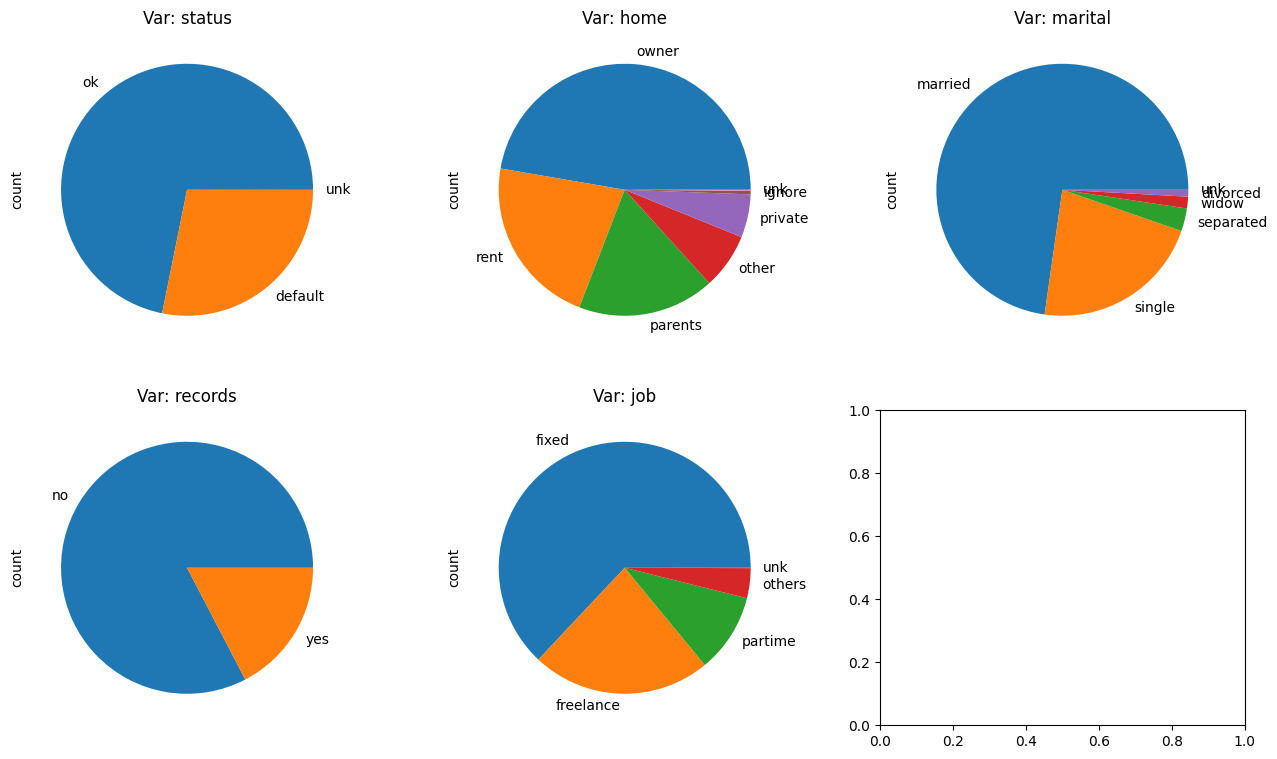

In [ ]:
cualis = cuali.columns
fig, ax = plt.subplots(2,3,figsize=(16,9))
i = 0
for row in range(2):
  for col in range(3):
    #Tu código aquí

## 1.7 Reagrupando categorias

In [ ]:
#Tu código aquí
freq_home

,count
home,
owner,2107
rent,973
parents,783
other,319
private,247
ignore,20
unk,6


Las categorias poco representativas

In [ ]:
#Tu código aquí
low_freq

Index(['ignore', 'unk'], dtype='object', name='home')

In [ ]:
#Tu código aquí
data['home'].value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,345
private,247


In [ ]:
#Tu código aquí
freq_marital

,count
marital,
married,3241
single,978
separated,130
widow,67
divorced,38
unk,1


Las categorias poco representativas

In [ ]:
#Tu código aquí
low_freq

Index(['separated', 'widow', 'divorced', 'unk'], dtype='object', name='marital')

In [ ]:
#Tu código aquí
data['marital'].value_counts()

,count
marital,
married,3241
single,978
other,236


## 1.8 Eliminando columnas

In [ ]:
data.drop(columns=['status'],inplace=True)

#**2. Exploración de Datos**


---


## 2.1 Datos Numericos

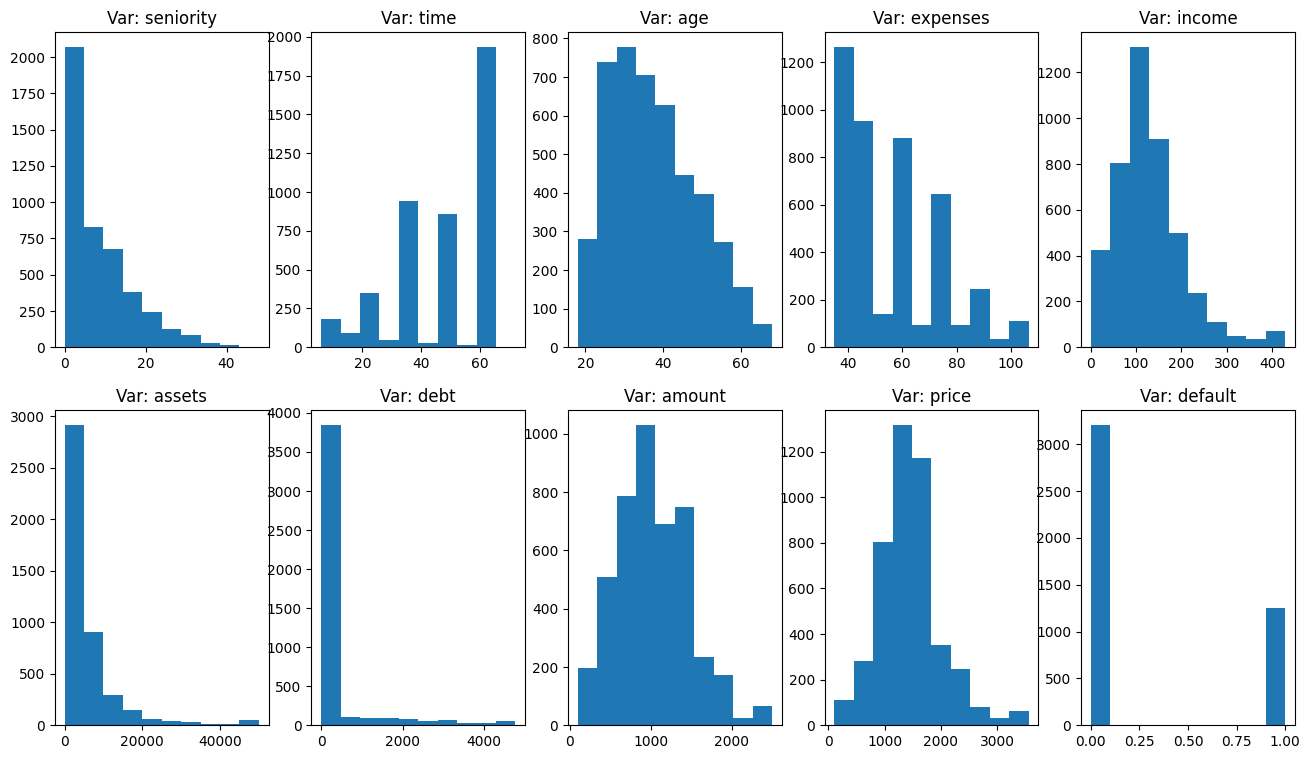

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(16,9))
i = 0
for row in range(2):
  for col in range(5):
    #Tu código aquí

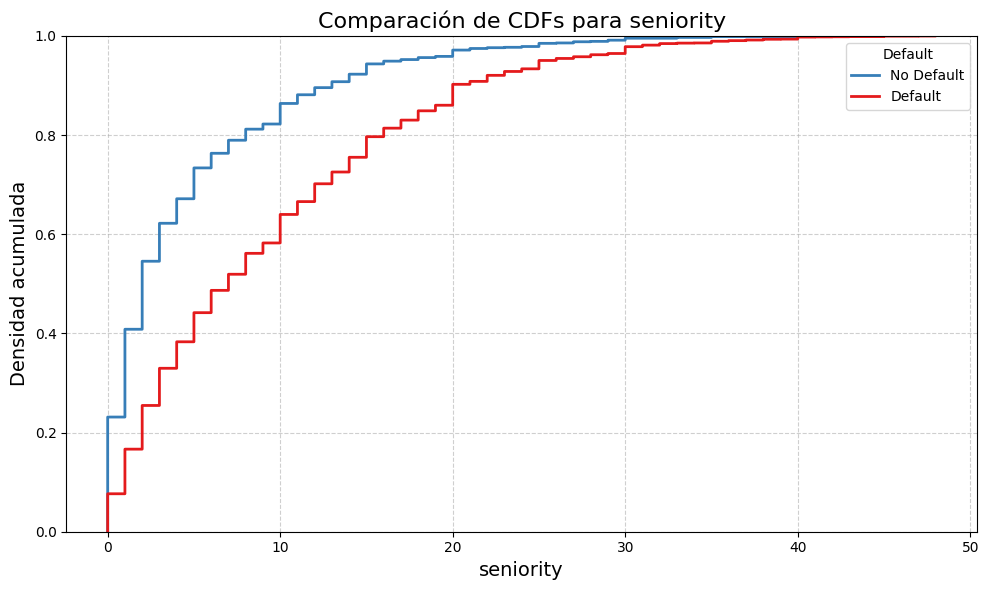

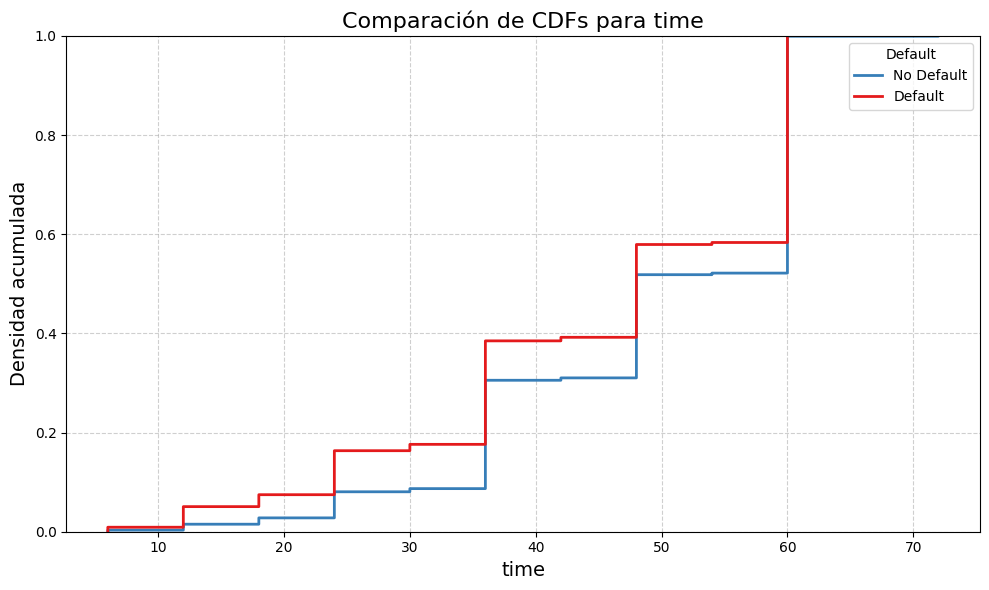

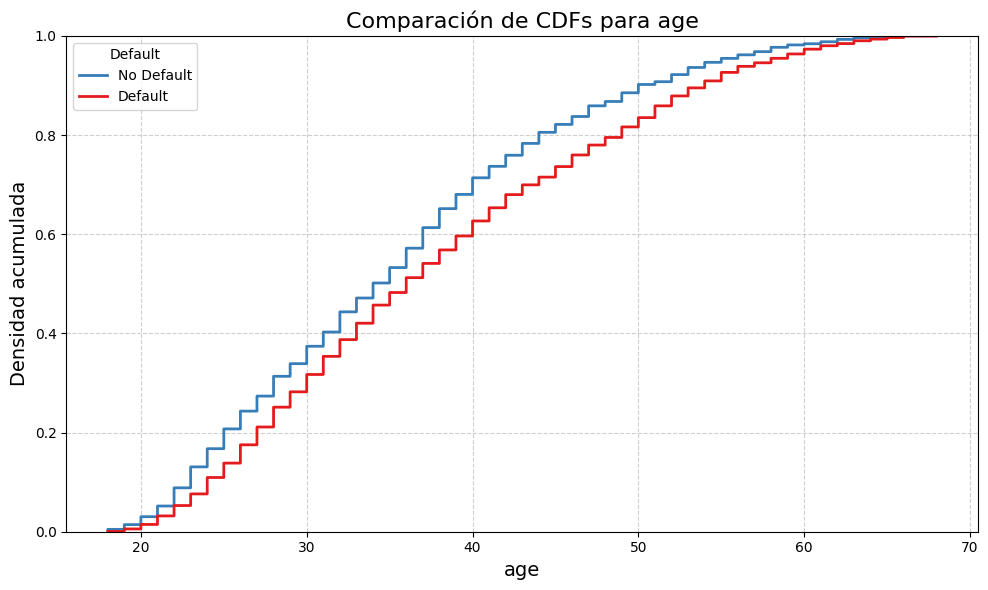

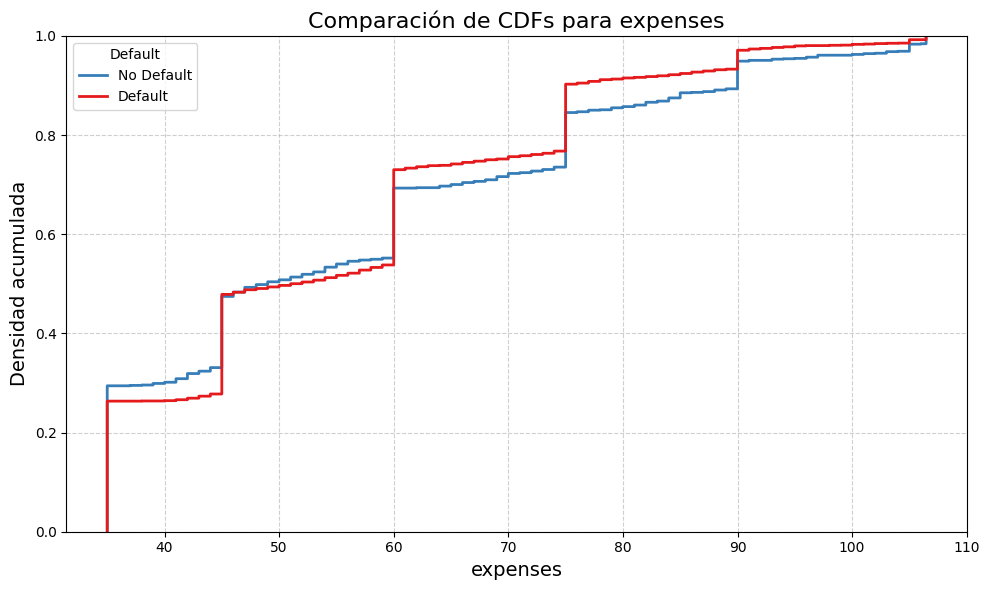

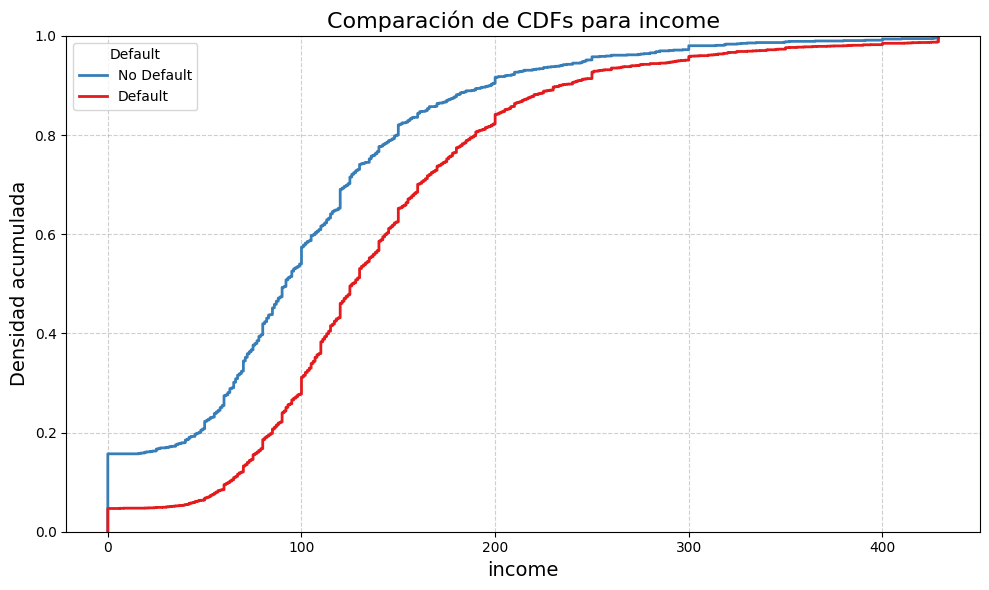

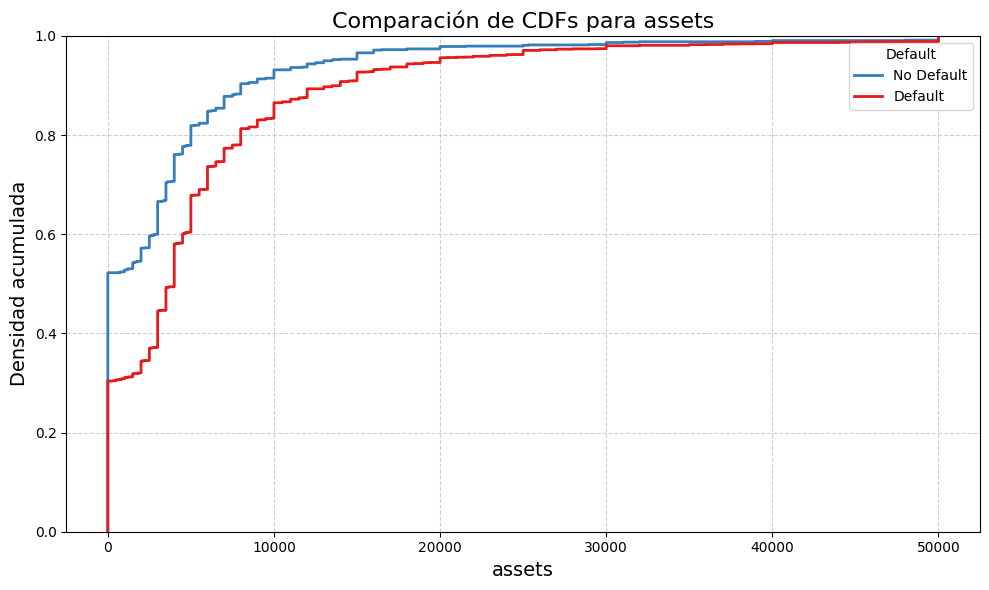

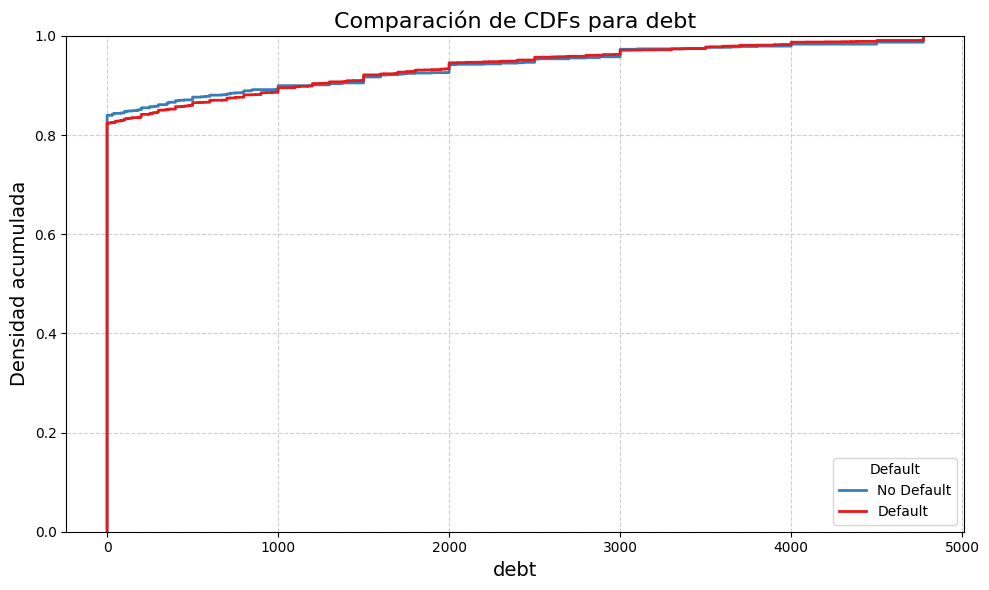

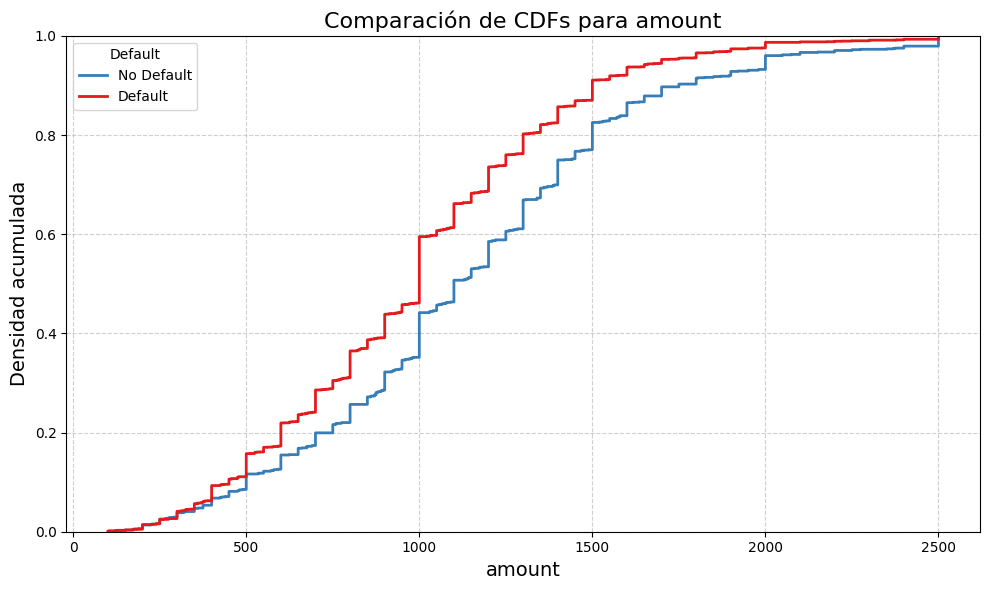

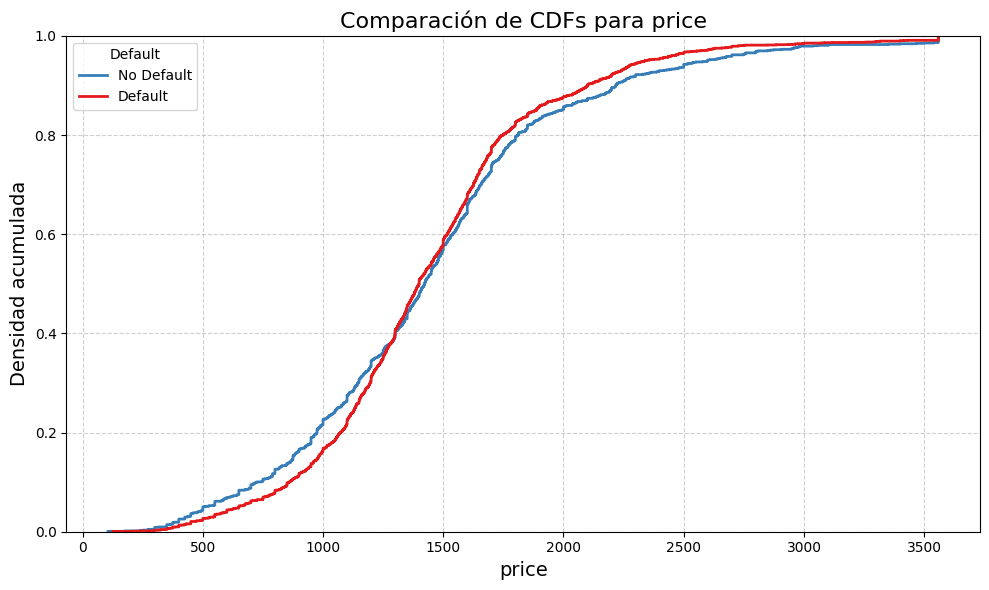

In [ ]:
for col in numerics.drop('default'):
    plt.figure(figsize=(10, 6))

    # Usar ecdataplot para trazar la CDF segmentada por 'default'
    #Tu código aquí

## 2.2 Datos Cualitativos

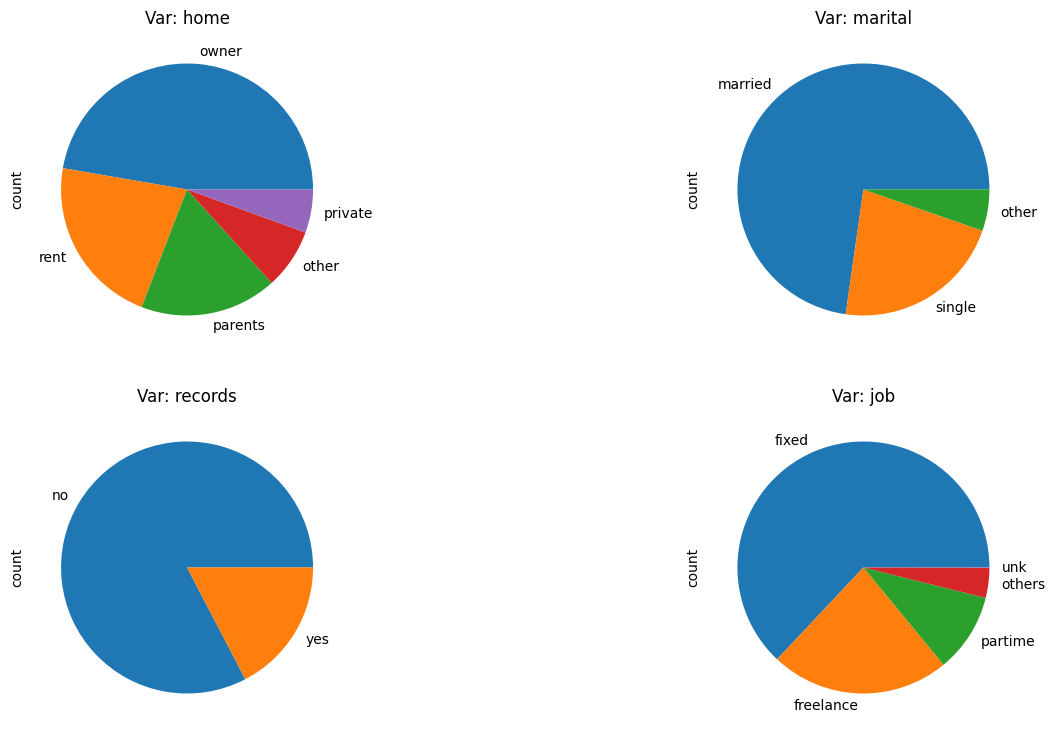

In [ ]:
cualis = data.select_dtypes('object').columns
fig, ax = plt.subplots(2,2,figsize=(16,9))
i = 0
for row in range(2):
  for col in range(2):
    #Tu código aquí

## 2.3 Contribucion al riesgo

<ipython-input-31-1d02f6fc2602>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "risk", x = df_risk.index, data = df_risk, palette ='coolwarm')
<ipython-input-31-1d02f6fc2602>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "risk", x = df_risk.index, data = df_risk, palette ='coolwarm')
<ipython-input-31-1d02f6fc2602>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "risk", x = df_risk.index, data = df_risk, palette ='coolwarm')
<ipython-input-31-1d02f6fc2602>:10: FutureWarning: 

Passing `palette` without assigning `hue` is

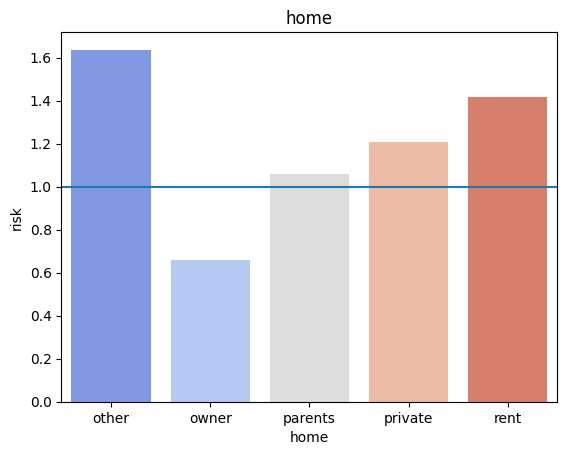

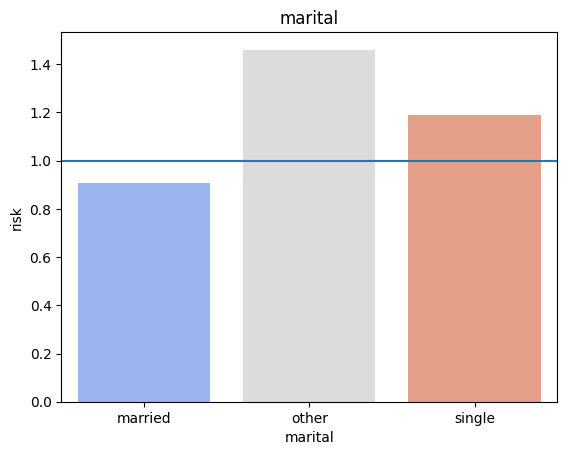

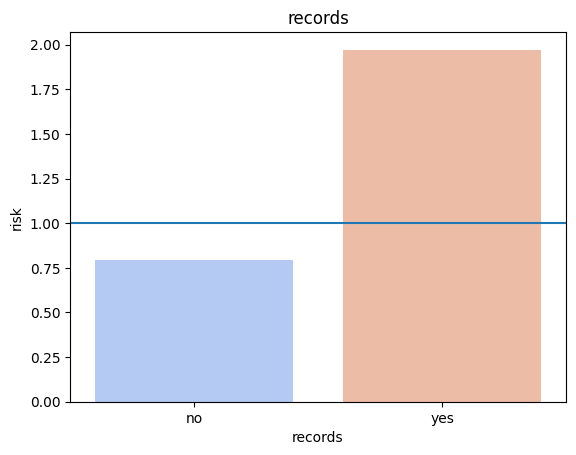

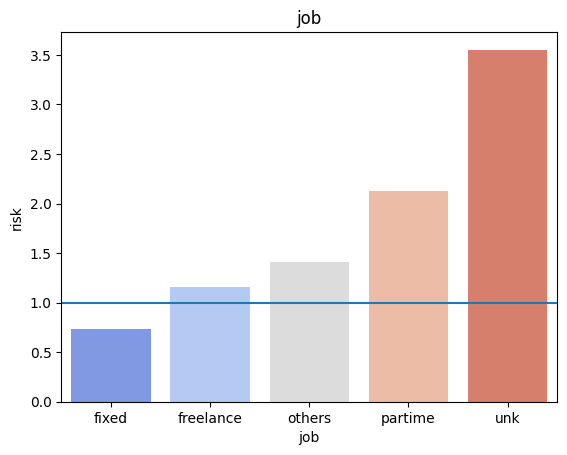

In [ ]:
cualis = data.select_dtypes(['object']).columns
global_mean = data["default"].mean()

for col in cualis:
    #Tu código aquí

#**3. Construcción de Modelos**


---

## 3.1 Partición de datos

In [ ]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310,910.0,0


In [ ]:
x = data.drop(columns='default')
x = pd.get_dummies(x)
y = data['default']

In [ ]:
# Seleccionar las columnas de tipo booleano
boolean_columns = x.select_dtypes(include='bool').columns

# Convertir las columnas booleanas a enteros
x[boolean_columns] = x[boolean_columns].astype(int)

In [ ]:
x.head()

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800,846.0,0,...,1,0,0,1,0,0,1,0,0,0
1,17,60,58,48.0,131.0,0.0,0.0,1000,1658.0,0,...,0,1,0,1,0,1,0,0,0,0
2,10,36,46,90.0,200.0,3000.0,0.0,2000,2985.0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,60,24,63.0,182.0,2500.0,0.0,900,1325.0,0,...,0,0,1,1,0,1,0,0,0,0
4,0,36,26,46.0,107.0,0.0,0.0,310,910.0,0,...,0,0,1,1,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = #Tu código aquí

## 3.2 Modelos de clasificacion

### Modelo logit

#### Ajustar modelo

In [ ]:
reg_logit = #Tu código aquí
reg_logit.fit(X_train, y_train)
reg_logit

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediccion inicial

In [ ]:
clas_logit = #Tu código aquí

In [ ]:
pd.crosstab(y_test, clas_logit,margins=True)

col_0,0,1,All
default,,,
0,895,67,962
1,232,143,375
All,1127,210,1337


In [ ]:
print(classification_report(y_test, clas_logit))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       962
           1       0.68      0.38      0.49       375

    accuracy                           0.78      1337
   macro avg       0.74      0.66      0.67      1337
weighted avg       0.76      0.78      0.75      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba = #Tu código aquí

In [ ]:
auc_roc = #Tu código aquí
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7671767151767153


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Tu código aquí

Punto óptimo de corte: 0.29599520042151284


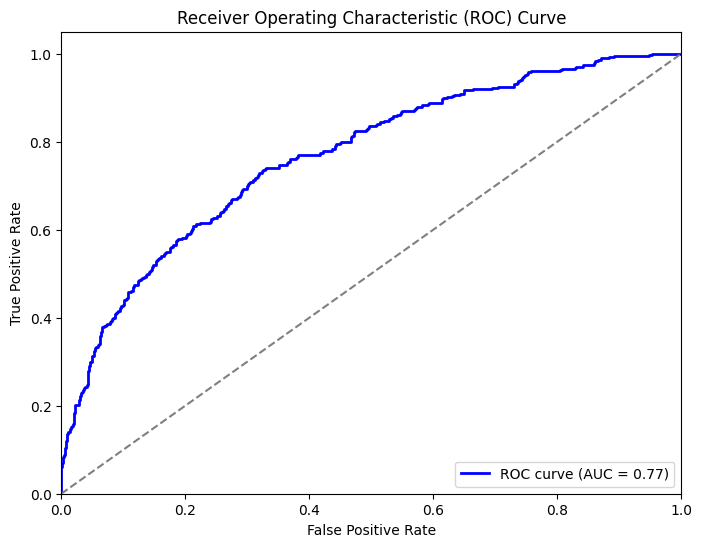

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Tu código aquí

In [ ]:
clas_logit2 = #Tu código aquí
pd.crosstab(y_test, clas_logit2,margins=True)

col_0,0,1,All
default,,,
0,644,318,962
1,98,277,375
All,742,595,1337


In [ ]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       962
           1       0.47      0.74      0.57       375

    accuracy                           0.69      1337
   macro avg       0.67      0.70      0.66      1337
weighted avg       0.76      0.69      0.70      1337



#### score

In [ ]:
def hist_fill_p(y_test,scaled_scores,bins=10):
    #Tu código aquí

In [ ]:
data['score_logit'] = #Tu código aquí

<ipython-input-47-25a4802befb5>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-47-25a4802befb5>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-47-25a4802befb5>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='ra

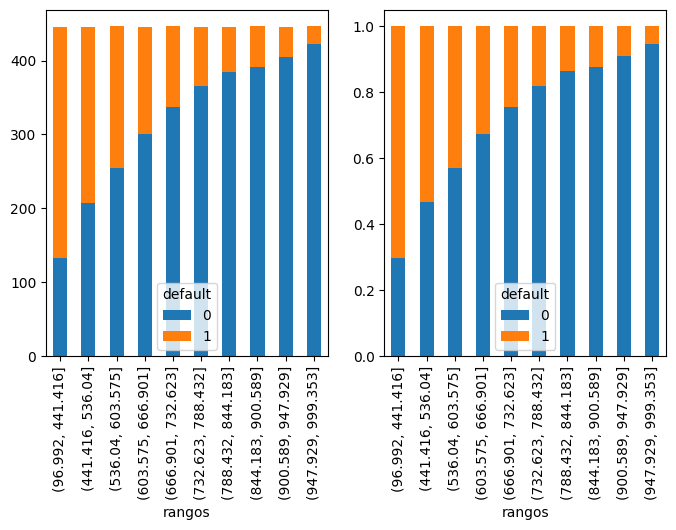

In [ ]:
hist_fill_p(data['default'],data['score_logit'])

### Modelo Arbol

#### Ajustar modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
reg_tree = #Tu código aquí
reg_tree.fit(X_train, y_train)
reg_tree

DecisionTreeClassifier(max_depth=5)

#### Prediccion inicial

In [ ]:
clas_tree = #Tu código aquí

In [ ]:
pd.crosstab(y_test, clas_tree,margins=True)

col_0,0,1,All
default,,,
0,888,74,962
1,231,144,375
All,1119,218,1337


In [ ]:
print(classification_report(y_test, clas_tree))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       962
           1       0.66      0.38      0.49       375

    accuracy                           0.77      1337
   macro avg       0.73      0.65      0.67      1337
weighted avg       0.76      0.77      0.75      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba = #Tu código aquí

In [ ]:
auc_roc = #Tu código aquí
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7685765765765766


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Tu código aquí

Punto óptimo de corte: 0.23308270676691728


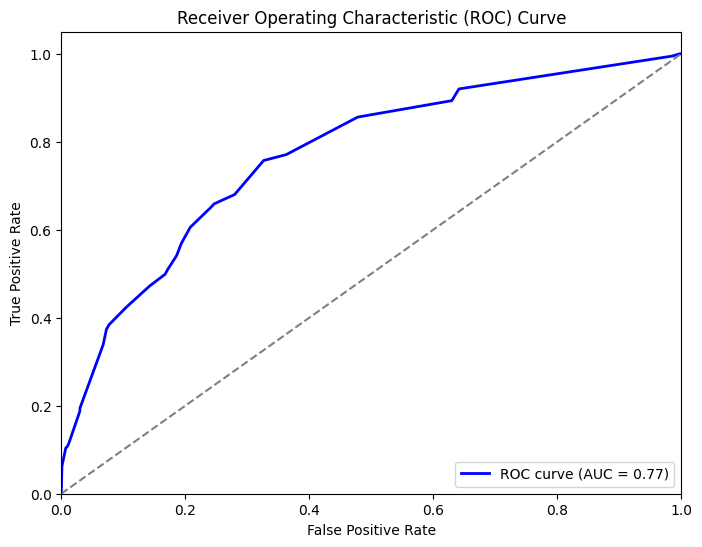

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Tu código aquí

In [ ]:
clas_tree2 = #Tu código aquí
pd.crosstab(y_test, clas_tree2,margins=True)

col_0,0,1,All
default,,,
0,693,269,962
1,120,255,375
All,813,524,1337


In [ ]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       962
           1       0.49      0.68      0.57       375

    accuracy                           0.71      1337
   macro avg       0.67      0.70      0.67      1337
weighted avg       0.75      0.71      0.72      1337



#### score

In [ ]:
data['score_tree'] = #Tu código aquí

<ipython-input-47-25a4802befb5>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-47-25a4802befb5>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-47-25a4802befb5>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='ra

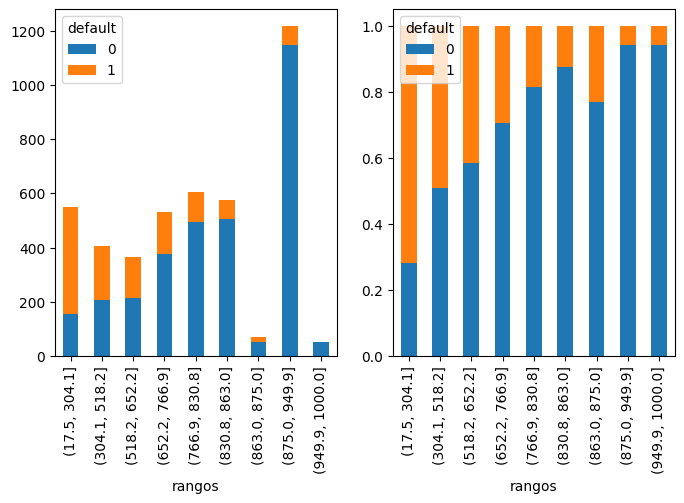

In [ ]:
hist_fill_p(data['default'],data['score_tree'])

### Modelo Random Forest

#### Ajustar modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
reg_forest = #Tu código aquí
reg_forest.fit(X_train, y_train)
reg_forest

RandomForestClassifier(max_depth=6, n_estimators=200)

#### Prediccion inicial

In [ ]:
clas_forest = #Tu código aquí

In [ ]:
pd.crosstab(y_test, clas_forest,margins=True)

col_0,0,1,All
default,,,
0,917,45,962
1,232,143,375
All,1149,188,1337


In [ ]:
print(classification_report(y_test, clas_forest))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       962
           1       0.76      0.38      0.51       375

    accuracy                           0.79      1337
   macro avg       0.78      0.67      0.69      1337
weighted avg       0.79      0.79      0.77      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba = #Tu código aquíreg_forest.predict_proba(X_test)[:, 1]

In [ ]:
auc_roc = #Tu código aquí
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8336909216909218


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#Tu código aquí

Punto óptimo de corte: 0.35486658677139005


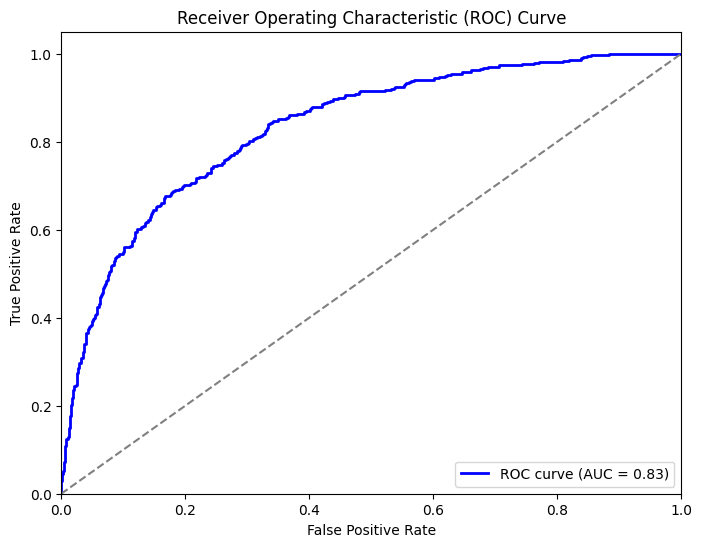

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Tu código aquí

In [ ]:
clas_forest2 = #Tu código aquí
pd.crosstab(y_test, clas_forest2,margins=True)

col_0,0,1,All
default,,,
0,801,161,962
1,122,253,375
All,923,414,1337


In [ ]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       962
           1       0.61      0.67      0.64       375

    accuracy                           0.79      1337
   macro avg       0.74      0.75      0.75      1337
weighted avg       0.80      0.79      0.79      1337



#### score

In [ ]:
data['score_forest'] = #Tu código aquí

<ipython-input-47-25a4802befb5>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-47-25a4802befb5>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-47-25a4802befb5>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='ra

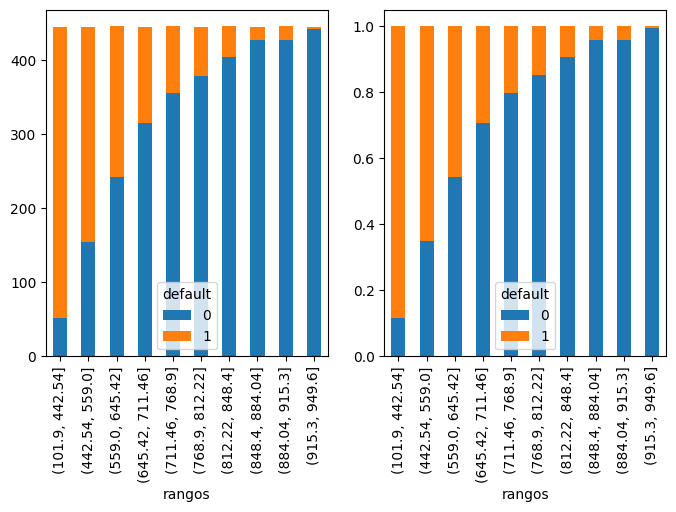

In [ ]:
hist_fill_p(data['default'],data['score_forest'])

#**4. Evaluación y Selección del Modelo**


---

In [ ]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       962
           1       0.47      0.74      0.57       375

    accuracy                           0.69      1337
   macro avg       0.67      0.70      0.66      1337
weighted avg       0.76      0.69      0.70      1337



In [ ]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       962
           1       0.49      0.68      0.57       375

    accuracy                           0.71      1337
   macro avg       0.67      0.70      0.67      1337
weighted avg       0.75      0.71      0.72      1337



In [ ]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       962
           1       0.61      0.67      0.64       375

    accuracy                           0.79      1337
   macro avg       0.74      0.75      0.75      1337
weighted avg       0.80      0.79      0.79      1337



In [ ]:
perfil = x.iloc[0:1]
perfil

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800,846.0,0,...,1,0,0,1,0,0,1,0,0,0


# 5. Implementación del modelo

## Crear el perfil de prueba

In [ ]:
def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero
    datos = {
        'seniority': 0.0, 'time': 0.0, 'age': 0.0, 'expenses': 0.0,
        'income': 0.0, 'assets': 0.0, 'debt': 0.0, 'amount': 0.0,
        'price': 0.0, 'home_other': 0.0, 'home_owner': 0.0,
        'home_parents': 0.0, 'home_private': 0.0, 'home_rent': 0.0,
        'marital_married': 0.0, 'marital_other': 0.0, 'marital_single': 0.0,
        'records_no': 0.0, 'records_yes': 0.0, 'job_fixed': 0.0,
        'job_freelance': 0.0, 'job_others': 0.0, 'job_partime': 0.0,
        'job_unk': 0.0}
          # Rellenar los datos mediante input del usuario
    for campo in datos:
        valor = input(f"{campo} (actual: {datos[campo]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[campo] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    return df

In [ ]:
# Uso de la función
df_usuario = crear_fila_dataframe()

seniority (actual: 0.0): 6000
time (actual: 0.0): 12
age (actual: 0.0): 35
expenses (actual: 0.0): 2000
income (actual: 0.0): 5000
assets (actual: 0.0): 
debt (actual: 0.0): 
amount (actual: 0.0): 
price (actual: 0.0): 
home_other (actual: 0.0): 0
home_owner (actual: 0.0): 0
home_parents (actual: 0.0): 1
home_private (actual: 0.0): 0
home_rent (actual: 0.0): 0
marital_married (actual: 0.0): 1
marital_other (actual: 0.0): 0
marital_single (actual: 0.0): 0
records_no (actual: 0.0): 0
records_yes (actual: 0.0): 0
job_fixed (actual: 0.0): 0
job_freelance (actual: 0.0): 0
job_others (actual: 0.0): 1
job_partime (actual: 0.0): 0
job_unk (actual: 0.0): 0


### Generamos una prediccion

In [ ]:
risk = reg_forest.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1-risk)*1000:.0f}")

Score del cliente 583


In [ ]:
risk = #Tu código aquí
print(f"Score del cliente {(1-risk)*1000:.0f}")

Score del cliente 760
